<br>**'Subway_DataAnalysis.ipynb' (코드들 원본)의 데이터 정제와 진행을 위한 확인 과정 중 <br> 데이터들의 양이 많아 print의 출력값들 또한 많아져 깃허브 내 코드 확인에 어려움이 있기에 <br> 빠른 코드 확인을 위해 몇몇 부분을 제거한 사본이다. <br>`(print를 이용한 전체 데이터들의 확인과정(총 2번)과` <br>
`(파이차트로 시각화하기 부분의) 모든 역들에 대한 파이차트 출력 총 3가지 과정은 제거하였다.) `<br>**

## 교통 데이터 분석을 통한 지하철 이용 현황 파악

대중교통 통계자료에서 내려받은 엑셀 파일(2023년 7월 수도권 대중교통 데이터- 교통카드 통계자료)에서의 **지하철 유무임별 이용현황의 데이터 정제**부터 시작하였다. 엑셀 내에서 필요없는 열(작업일시)열은 지운 후 '찾기 및 바꾸기'를 통해 콤마를 지우고, 이를 CSV 파일로 저장하여 데이터를 읽어낸다. 데이터를 확인하였을 때, 숫자에 '  ' 가 있으므로 (문자열로 처리되었다는 소리이다) 이후 데이터 처리를 위해 헤더데이터를 next() 함수로 제외하고 4번열부터 7번열까지의 데이터를 정수로 바꿔준다 (int로 변환).

In [1]:
import csv
f = open('subwaydata.csv')
data = csv.reader(f)
header = next(data)        #'사용월'~'무임하차' header 데이터는 next 함수로 제외한다
for row in data:
    for i in range(4,8):
        row[i] = int(row[i])      #각 열의 값을 정수로 바꾸어준다

<br>

### 유임 승차 비율이 가장 높은 역 알아보기

In [2]:
import csv

f= open('subwaydata.csv')
data = csv.reader(f)
next(data)

mx=0
rate=0
mx_station = ''

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] != 0 and (row[4]+row[6]) > 100000 :
        rate = row[4] / (row[4]+row[6])       
        if rate*100 > 94 :                          
            mx = rate
            print(row, round(rate*100,2))

['Jul-23', '2호선', '209', '한양대', 230270, 244345, 12448, 12987] 94.87
['Jul-23', '2호선', '239', '홍대입구', 2003380, 2163741, 95446, 92543] 95.45
['Jul-23', '경부선', '1001', '서울역', 250210, 80319, 13389, 3090] 94.92
['Jul-23', '6호선', '2632', '한강진', 268859, 323128, 16679, 16218] 94.16
['Jul-23', '9호선', '4125', '신논현', 887740, 868353, 52223, 50009] 94.44
['Jul-23', '공항철도 1호선', '4203', '홍대입구', 423137, 423247, 18692, 17583] 95.77
['Jul-23', '공항철도 1호선', '4206', '마곡나루(서울식물원)', 260180, 249703, 14893, 15091] 94.59


유무임 승차 인원의 합이 10만명 이상인 경우 중 유임 승차 비율이 94%보다 큰 경우들에 대한 데이터들만을 추출하도록 하였다. 2023년 7월의 데이터이며, 순서대로 '호선명', '역ID', '지하철역명', '유임승차 인원', '유임하차자 인원', '무임승차자 인원', '무임하차 인원'을 확인할 수 있다.

In [3]:
import csv

f= open('subwaydata.csv')
data = csv.reader(f)
next(data)

mx=0
rate=0
mx_station = ''

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
    if row[6] != 0 and (row[4]+row[6]) > 100000 :  # 무임승차인원이 0인 경우도 존재하기에 이를 제거하였다.
        rate = row[4] / (row[4]+row[6])             # 유임 승차 비율은 유임승차인원을 (유임승차인원+무임승차인원)으로 나눈 값이다.
        if rate > mx :                              #유임 승차 비율이 가장 최대일 때를 찾는 과정이다.
            mx = rate
            mx_station = row[3]+' ' +row[1]
            
print(mx_station ,round(mx*100,2))

홍대입구 공항철도 1호선 95.77


위를 통해 2023년 7월의 (유무임 승차 인원의 합이 10만명 이상인 경우 중) 유임 승차 비율이 가장 높은 역이 '홍대입구역' 임을 알 수 있다.

<br>

### 유무임 승하차 인원이 가장 많은 역 알아보기

In [4]:
import csv

f = open('subwaydata.csv')
data = csv.reader(f)
next(data)
mx = [0] * 4
mx_station = [''] *4
label = ['유임승차','유임하차','무임승차','무임하차']
for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])
        if row[i] > mx[i-4] :
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]
for i in range(4) :
    print(label[i]+' : '+mx_station[i],mx[i])        

유임승차 : 강남 2호선 2254653
유임하차 : 강남 2호선 2183636
무임승차 : 종로3가 1호선 282721
무임하차 : 영등포 경부선 278294


<br>

### 각 역들의 유무임 승하차 비율 파이차트로 시각화하기
**파이차트로 나타내기** <br> 유임 승차 비율이 가장 높은 역을 시각적으로 확인하기 위하여 파이차트로 나타낼 수 있다. 아래 코드를 통해 모든 역들에 대한 각각의 유임승차, 유임하차, 무임승차, 무임하차 인원들의 비율을 파이차트로 시각화하여 확인할 수 있다.

<br>

### [사용자 입력 코드] <br><br> 사용자 입력에 따른 역의 유임승차 비율 파이차트 출력
원하는 열의 유뮤임승하차 비율을 확인하기 위하여 사용자 입력 함수와 함께 코드를 제작하였다. 알고자 하는 호선명을 우선 입력 후, 지하철역명을 입력하면 그에 따른 유뮤임승하차 비율의 파이차트를 제공 받을 수 있다.

호선명을 입력하세요 (예.2호선): 2호선
지하철역 이름을 입력하세요 (예.을지로4가): 을지로4가


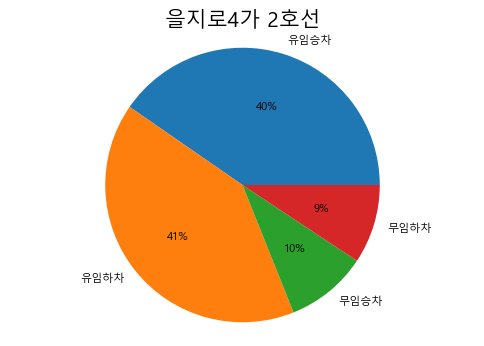

In [5]:
import csv
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')


with open('subwaydata.csv') as f:
    data = csv.reader(f)
    next(data)

    line_name = input("호선명을 입력하세요 (예.2호선): ")
    station_name = input("지하철역 이름을 입력하세요 (예.을지로4가): ")

    found = False
    for row in data:
        if row[1] == line_name and row[3] == station_name:
                label = ['유임승차', '유임하차', '무임승차', '무임하차']
                values = [int(row[i]) for i in range(4, 8)]

                plt.figure(dpi=100)
                plt.title(row[3] + ' ' + row[1],size=15)
                plt.pie(values, labels=label, autopct='%1.f%%',textprops={'fontsize': 8})
                plt.axis('equal')
                plt.show()
                found = True
                break

    if not found:
        print("입력하신 조건에 해당하는 데이터를 찾을 수 없습니다.")

<br>

위의 코드를 실행시키면 호선명과 지하철역명을 입력을 하는 빈칸이 제시되며, 입력 시 데이터를 파이차트 형태로 제공받을 수 있다. 아래는 '5호선' ,'종로3가' 에 대한 유뮤임승하차 비율의 파이차트 결과 예시이다.

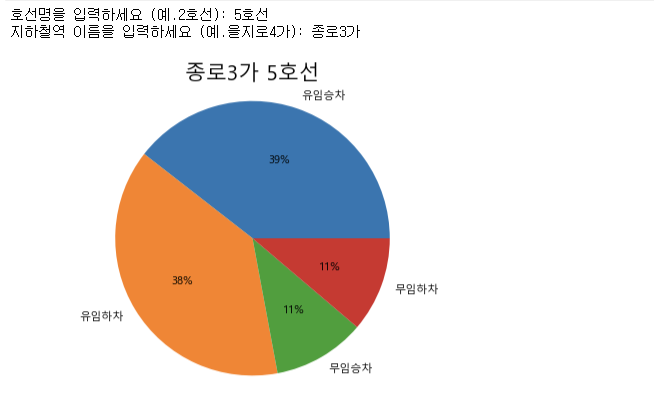

<br><br>

<br><br> **아래부터는 출근 시간대 사람들이 가장 많이 타고 내리는 역을 파악하기 위하여 지하철 시간대별 데이터 시각화를 진행하고자 한다.**

### 지하철 시간대별 이용 현황 데이터 정제하기

다음으로는 내려받은 엑셀 파일(2023년 7월 수도권 대중교통 데이터- 교통카드 통계자료)에서의 **지하철 시간대별 이용현황 데이터 정제**를 진행하였다. CSV 파일명은 'subwaytime2'이다. 앞서 진행하였던 정제와 방식은 동일하나, 아래의 데이터에서 확인 가능하듯 두번째 행의 '승차' '하차' 반복 데이터는 분석에 직접적인 영향을 주지는 않기에 `next함수를 두번 사용하여 헤더와 승차하차 두 줄의 데이터를 제외시킨다.` 그 다음, 문자로 인식되어 있는 숫자 데이터들을 모두 정수형으로 변환하여주었다.

In [6]:
import csv
f = open('subwaytime2.csv')
data = csv.reader(f)
next(data)
next(data)
for i in range(4,8):
    row[i] = int(row[i])
print(row)

['Jul-23', '2호선', '204', '을지로4가', 319804, 322385, 76283, 73757]


<br>

### 특정 출근 시간대의 승차 인원 막대그래프로 시각화하기
특정 출근 시간대에 사람들이 지하철역에 가장 많이 들어오고 나가는 데이터를 알아보고자 한다. 위의 데이터들에서 알 수 있듯, 데이터의 row[10]은 시간상 오전 8시를 의미하며, 시간대는 24시를 기준으로 제시되어있다. 특정 시간대에 역들에 대한 데이터를 정수형태로 저장 후 이를 직관적으로 확인할 수 있도록 막대그래프로 다시 시각화하였다.

In [7]:
import csv
f=open('subwaytime2.csv')
data = csv.reader(f)
next(data)
next(data)
result=[]
for row in data:
    row[4:]=map(int,row[4:])   #map 함수를 사용하여 데이터를 한꺼번에 정수형으로 바꿀 수 있다.
    result.append(row[10])

<br>

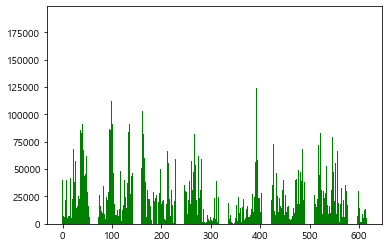

In [8]:
import matplotlib.pyplot as plt
plt.bar(range(len(result)),result,color='green')
plt.show()

위 막대그래프들의 결과 데이터의 편차가 매우 크기에, sort 정렬을 실행하여 특정 역들의 사용량이 매우 큼을 확인할 수 있다.

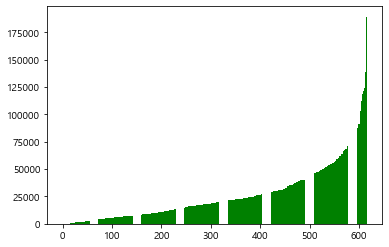

In [9]:
import matplotlib.pyplot as plt
result.sort()
plt.bar(range(len(result)),result,color='green')
plt.show()

<br><br>
### 출근/퇴근 시간대에서의 승차 인원 확인하기
위에서는 오전 8시~8시 59분이라는 특정 시간대에서의 승차 인원을 확인하였다면, 목표로 하여 알고자하는 조금 더 긴 시간대 (출근시간대)에서의 승차 인원을 확인해보고자 한다. 출근 시간대의 승차 인원들을 합치는 방법을 사용할 수 있다.<br> **`주 출근 시간대인 7시부터 9시까지의 승차 인원들`을 확인한다.** 

In [10]:
import csv

f = open('subwaytime2.csv')
data = csv.reader(f)
next(data)
next(data)
mx =0
mx_station =''
for row in data:
    row[4:]=map(int,row[4:])
    if sum(row[10:15:2]) > mx :       #row[10]에서 rowp[15]까지이며, 승차 인원을 확인하고자 하기에 하차를 건너뛰기 위해 간격을 둔다
        mx = sum(row[10:15:2])
        mx_station = row[3] +'('+row[1]+')'
print(mx_station, mx)

신림(2호선) 623384


<br> **이번에는 `주 퇴근 시간대인 오후 6시부터 8시까지의 승차 인원들`**을 확인한다.

In [11]:
import csv

f = open('subwaytime2.csv')
data = csv.reader(f)
next(data)
next(data)
mx =0
mx_station =''
for row in data:
    row[4:]=map(int,row[4:])
    if sum(row[28:36:2]) > mx :
        mx = sum(row[28:36:2])
        mx_station = row[3] +'('+row[1]+')'
print(mx_station, mx)

강남(2호선) 980063


2023년 7월의 데이터 결과, 주 출근 시간대에는 신림역, 주 퇴근 시간대에는 강남역에 승차 인원이 가장 많다는 것을 확인할 수 있다. 주 퇴근 시간대인 강남역에 승차 인원들이 많음을 통해 직장이 밀집된 지역임에 따른 결과라 추가적으로 예측할 수도 있다. <br><br>

### [사용자 입력 코드]<br><br>사용자가 알고자 하는 특정 시간대에 사람들이 가장 많이 타는 역은 어디인가

In [12]:
import csv
f=open('subwaytime2.csv')
data=csv.reader(f)
next(data)
next(data)
mx=0
mx_station=''
t=int(input('승차인원이 가장 많은 역이 궁금한 시간대를 입력해주세요(24시 기준) : '))

for row in data :
    row[4:] = map(int,row[4:])
    a=row[4+(t-4)*2]
    if a >mx :
        mx=a
        mx_station = row[3]+'('+row[1]+')'
print(mx_station, mx)

승차인원이 가장 많은 역이 궁금한 시간대를 입력해주세요(24시 기준) : 17
강남(2호선) 261680


위의 코드를 통해 승차 인원이 가장 많은 역을 알고자 하는 사용자가 직접 입력을 통해 결과를 제공받을 수 있다. 코드 실행 시 아래와 같이 보인다.

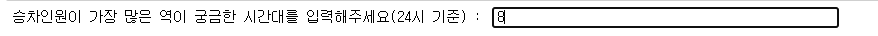

<br><br>

### 시간대별 지하철 승하차 인원 추이 시각화하기

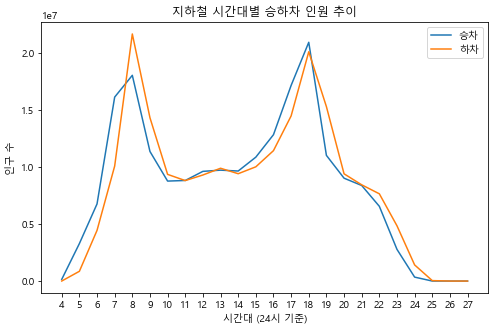

In [13]:
import csv
import matplotlib.pyplot as plt

f=open('subwaytime2.csv')
data=csv.reader(f)
next(data)
next(data)

sb_on = [0]*24
sb_off = [0]*24

for row in data :
    row[4:] = map(int,row[4:])
    for i in range(24) :
        sb_on[i] += row[4+i*2]
        sb_off[i] += row[5+i*2]
        
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(8, 5))
plt.title('지하철 시간대별 승하차 인원 추이')
plt.xlabel("시간대 (24시 기준)")
plt.ylabel("인구 수")
plt.plot(sb_on, label='승차')
plt.plot(sb_off, label='하차')
plt.legend()
plt.xticks(range(24),range(4,28))
plt.show()

x축 위에 제시된 1e7은 인구 수가 x축에 제시된 숫자에 천만명을 더 곱한 인원수임을 의미한다. 그래프를 시각화하여 나타낸 결과, 출근시간대의 경우 오전 7~ 9시에 승차 인원이 많으며, 하차 인원은 8~ 9시에 많음을 볼 수 있다. 그리고 퇴근 시간대 승하차의 경우, 오후 6~8시에 가장 많이 일어남을 확인할 수 있다.

<br>

### 데이터 출처

대중교통 데이터 출처 : (https://www.t-money.co.kr/)